## Assignment 1: Exploring the MovieLens Dataset

### Objective:
Download the data (link 1 above contains instructions on how you can do that) and extend the
presented data exploration to include:

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
datas = ['zero', 'user_id', 'movie_id', 'rating', 'timestamp', 'gender', 'age', 'occupation', 'zip', 'title', 'genres']
data = pd.read_table('genre_seperated.dat', sep='\t', header=None, names=datas, engine='python')

<br>Q1: An aggregate of the movie ratings for each particular genre. (My aggregation by calculating its mean value)

In [19]:
mean_ratings_genres = data.pivot_table('rating', index='genres',aggfunc='mean')

In [21]:
mean_ratings_genres[:]

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


<br>Q2: The top 5 highest ranked genre by women.

In [23]:
mean_ratings_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean') 

In [25]:
top_female_ratings = mean_ratings_gender.sort_values(by='F', ascending=False)

In [26]:
top_female_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Musical,3.809108,3.596332
Drama,3.765662,3.766589


<br>Q3: The top 5 highest ranked genre by men.

In [27]:
top_male_ratings = mean_ratings_gender.sort_values(by='M', ascending=False)

In [28]:
top_male_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Drama,3.765662,3.766589
Crime,3.689332,3.713720


In [34]:
mean_ratings_age = data.pivot_table('rating', index='movie_id', columns='age', aggfunc='mean') 

<br>Q4: A breakdown of a movies ratings by age, use any movie of your choice.
<br>My chosen movie: movie_id = 1 

In [35]:
mean_ratings_age.query('movie_id == [1]')

age,1,18,25,35,45,50,56
movie_id,,,,,,,
1,3.919643,4.017857,4.201266,4.3026,4.104895,4.092593,3.886792


<br>Q5: A function that given a user id and movie id , returns a list of user ids for
other users that rated the movie identied by the provided movie id with the same score.

In [177]:
def findSameScoreUsers(userId, movieId):
    movie = data[(data.user_id == userId) & (data.movie_id == movieId)]
    score = movie['rating'].values[0]
    users = pd.Series(data[(data.rating == score) & (data.movie_id == movieId)]['user_id'])
    users = set(users)
    users.remove(userId)
    return users

In [181]:
findSameScoreUsers(1, 1193)

{2,
 17,
 19,
 24,
 33,
 39,
 53,
 54,
 58,
 81,
 88,
 89,
 95,
 102,
 107,
 120,
 123,
 131,
 150,
 155,
 166,
 169,
 175,
 180,
 190,
 195,
 208,
 235,
 236,
 259,
 261,
 265,
 266,
 270,
 281,
 287,
 292,
 293,
 297,
 299,
 300,
 301,
 306,
 307,
 315,
 319,
 327,
 332,
 334,
 339,
 352,
 355,
 357,
 361,
 409,
 424,
 425,
 437,
 438,
 439,
 440,
 442,
 445,
 451,
 453,
 462,
 477,
 480,
 482,
 489,
 491,
 502,
 504,
 505,
 507,
 515,
 516,
 520,
 524,
 526,
 529,
 537,
 549,
 550,
 551,
 558,
 560,
 582,
 588,
 599,
 611,
 622,
 626,
 637,
 650,
 661,
 671,
 673,
 677,
 679,
 681,
 682,
 692,
 701,
 710,
 711,
 743,
 744,
 746,
 752,
 760,
 764,
 770,
 771,
 774,
 784,
 785,
 791,
 833,
 839,
 840,
 841,
 843,
 846,
 870,
 900,
 919,
 928,
 935,
 946,
 957,
 965,
 980,
 983,
 994,
 1010,
 1015,
 1017,
 1018,
 1019,
 1027,
 1028,
 1035,
 1036,
 1038,
 1040,
 1048,
 1058,
 1062,
 1068,
 1077,
 1084,
 1088,
 1098,
 1099,
 1101,
 1105,
 1108,
 1113,
 1117,
 1121,
 1124,
 1133,
 1134,
 

<br>Q6: Some other statistic, figure, aggregate, or plot that you created using this dataset,
along with a short description of what interesting observations you derived from it.
<br>- I'm interested in the movie favor(identified by the rating) among people divided by their age

In [211]:
mean_ratings_age = data.pivot_table('rating', index='age', columns='genres', aggfunc='mean') 

In [212]:
mean_ratings_age

genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
age,,,,,,,,,,,,,,,,,,
1,3.506385,3.449975,3.476113,3.241642,3.497491,3.710170,3.730769,3.794735,3.317647,4.145455,3.254184,3.568306,3.631522,3.621284,3.478698,3.550373,3.895437,3.576119
18,3.447097,3.408525,3.624124,3.294382,3.460440,3.668054,3.865865,3.721930,3.353778,3.997368,3.172682,3.560291,3.525387,3.534300,3.426067,3.494634,3.853136,3.471533
25,3.453358,3.443163,3.701118,3.426846,3.490378,3.680321,3.946690,3.726428,3.452484,4.058725,3.200096,3.619857,3.610818,3.546730,3.443822,3.535471,3.841240,3.607826
35,3.538107,3.515291,3.740764,3.518598,3.562017,3.733736,3.953747,3.782512,3.482301,4.064910,3.276022,3.721587,3.697396,3.651142,3.502119,3.615934,3.901130,3.679278
45,3.528543,3.528963,3.734856,3.527593,3.591789,3.750661,3.966521,3.784356,3.532468,4.105376,3.262274,3.744484,3.754350,3.685990,3.482515,3.639657,3.960554,3.667135
50,3.611333,3.628163,3.780020,3.556555,3.646868,3.810688,3.908108,3.878415,3.581570,4.175401,3.158940,3.798254,3.885795,3.758111,3.564456,3.709668,3.974184,3.741322
56,3.610709,3.649064,3.756233,3.621822,3.650949,3.832549,3.961538,3.933465,3.532700,4.125932,3.254401,3.886713,3.890545,3.816531,3.497746,3.719749,4.067285,3.792198


<br>Part 1: The overview of each genres for all age range

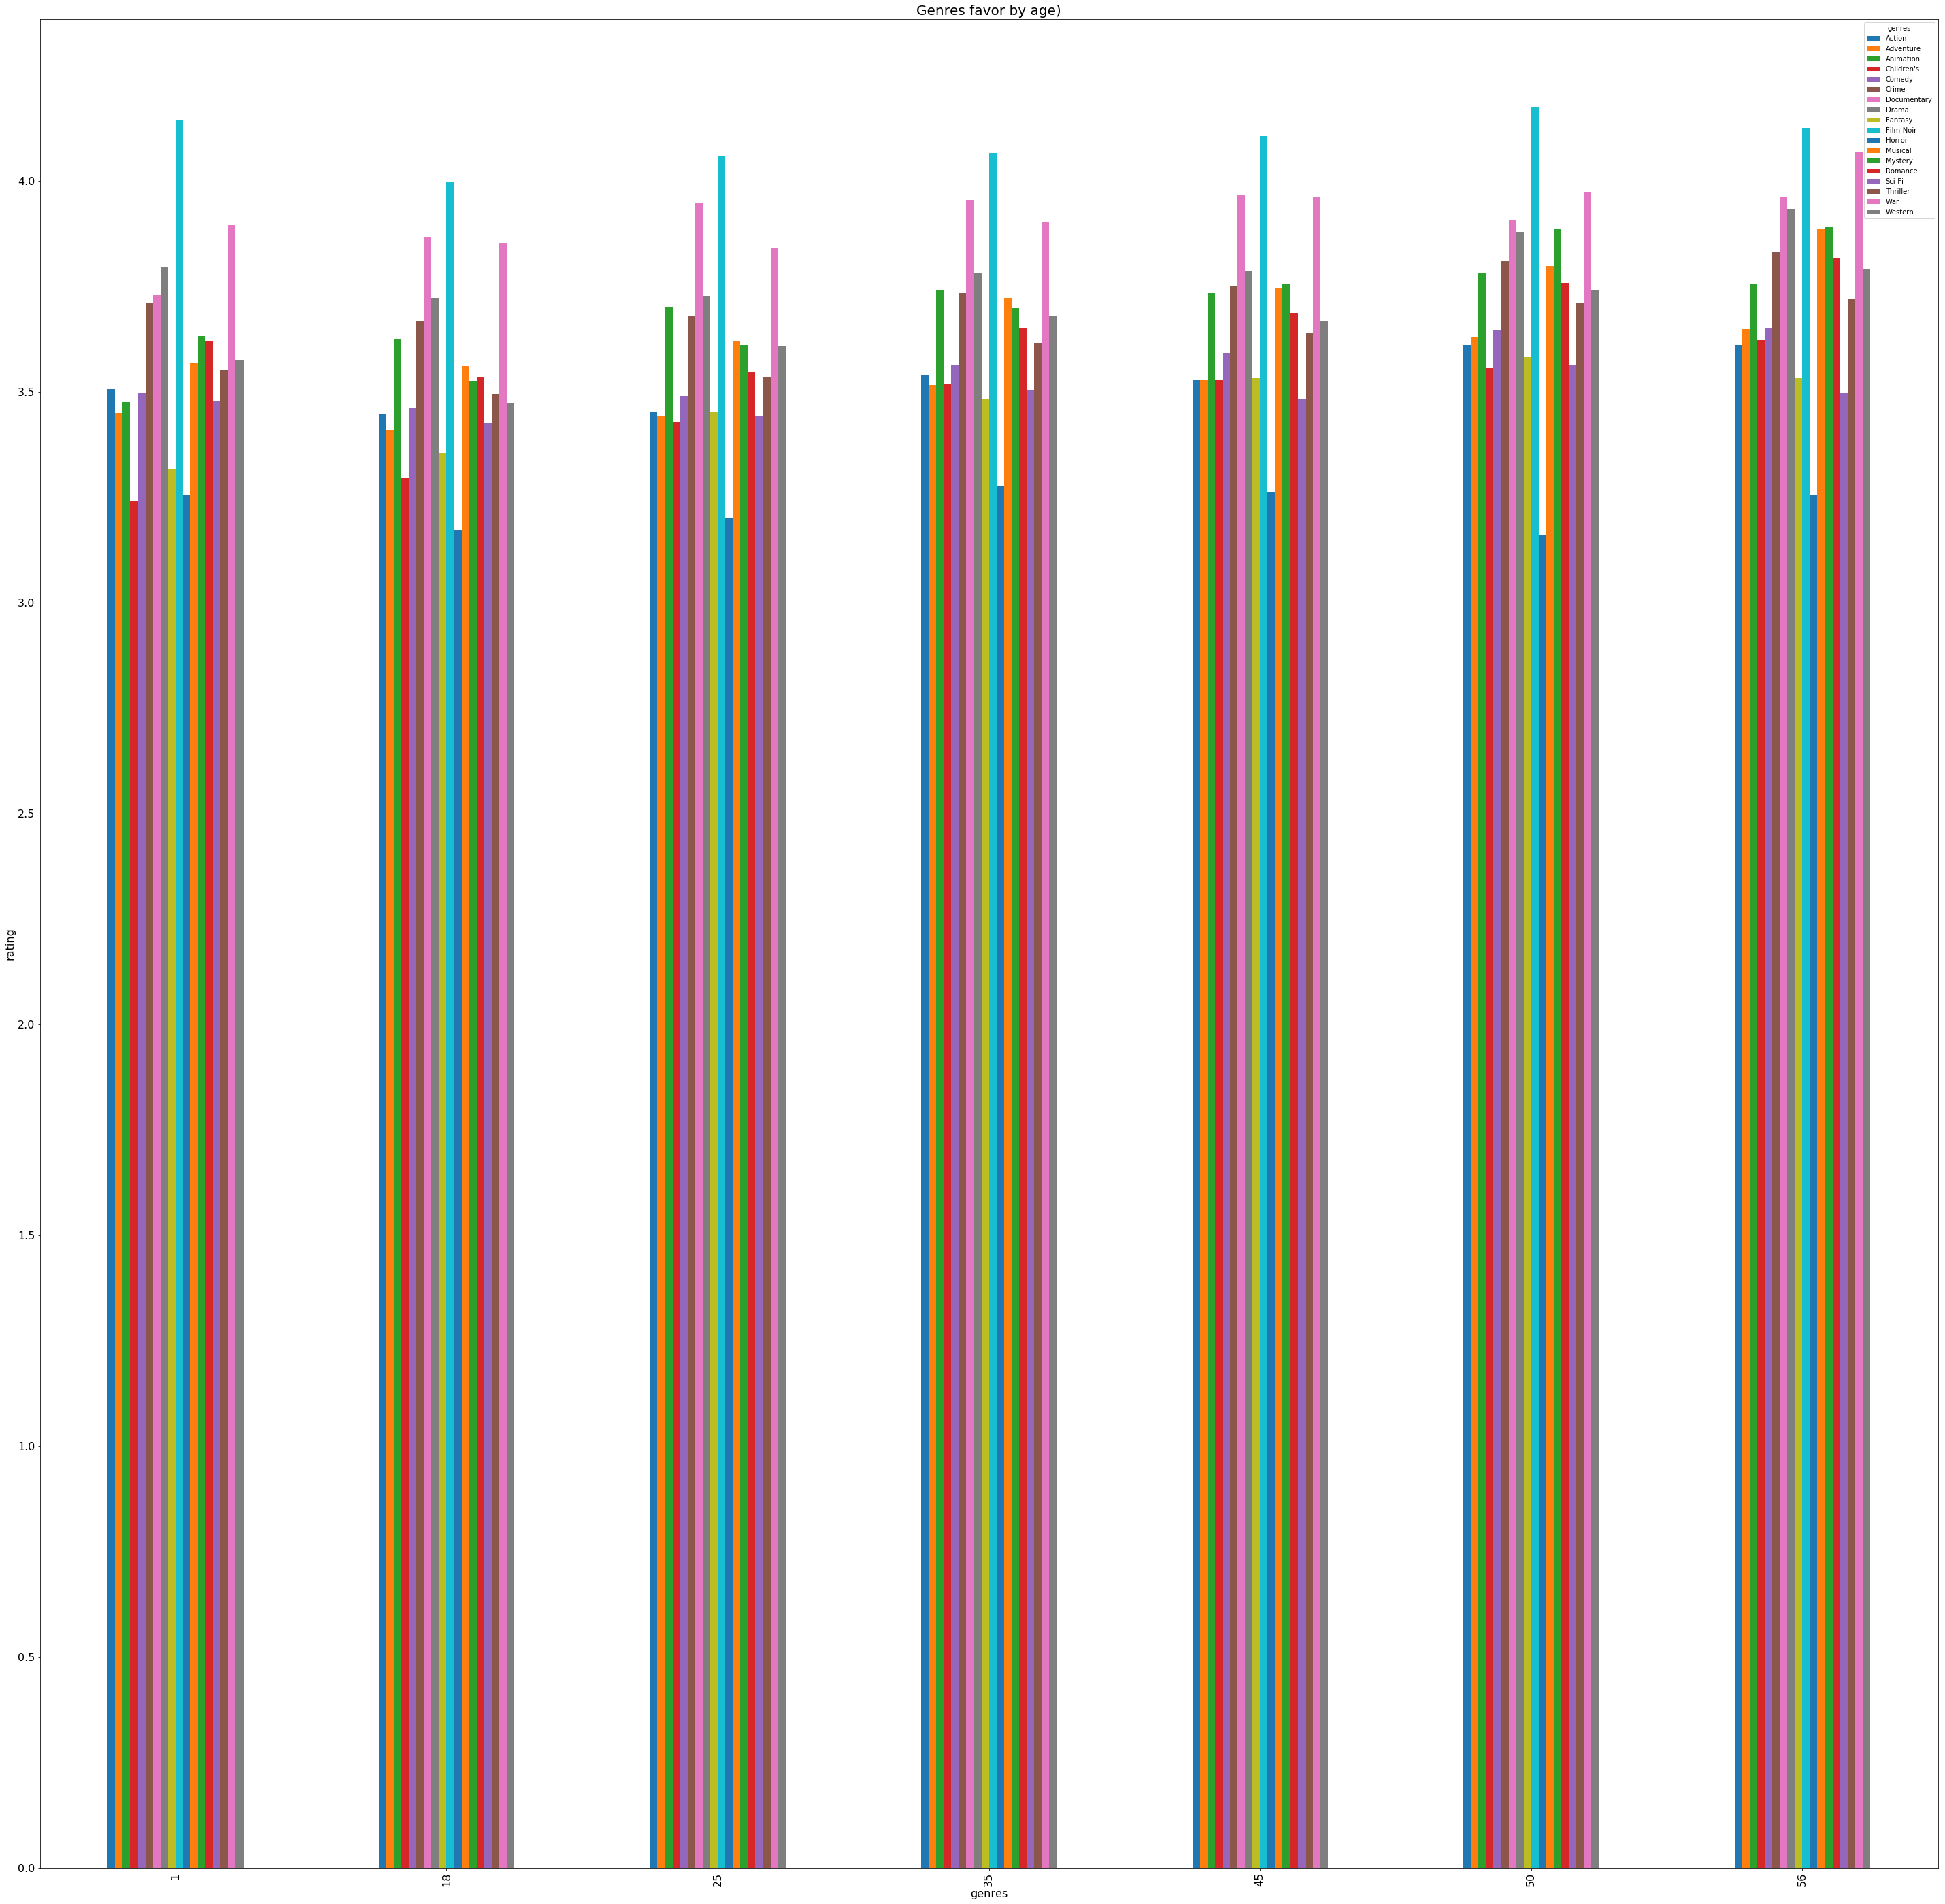

In [214]:
mean_ratings_age.plot(kind='bar', figsize=[50, 50], legend=True, fontsize=16)
plt.title('Genres favor by age)', fontsize=20)
plt.ylabel('rating', fontsize=16)
plt.xlabel('genres', fontsize=16);
plt.show()

Conclusion: The rating for each genre doesn't vary significant with different age, which contradict my assumption. Thus, it seems like people in all age share similar movie favor. eg. Film-Noir, Documentary and Mystery are Top-3 favored while Horror is disliked by everyone.

<br> Part 2: Specific cases

In [230]:
mean_ratings_age_musical = mean_ratings_age[mean_ratings_age.columns[11:12]]

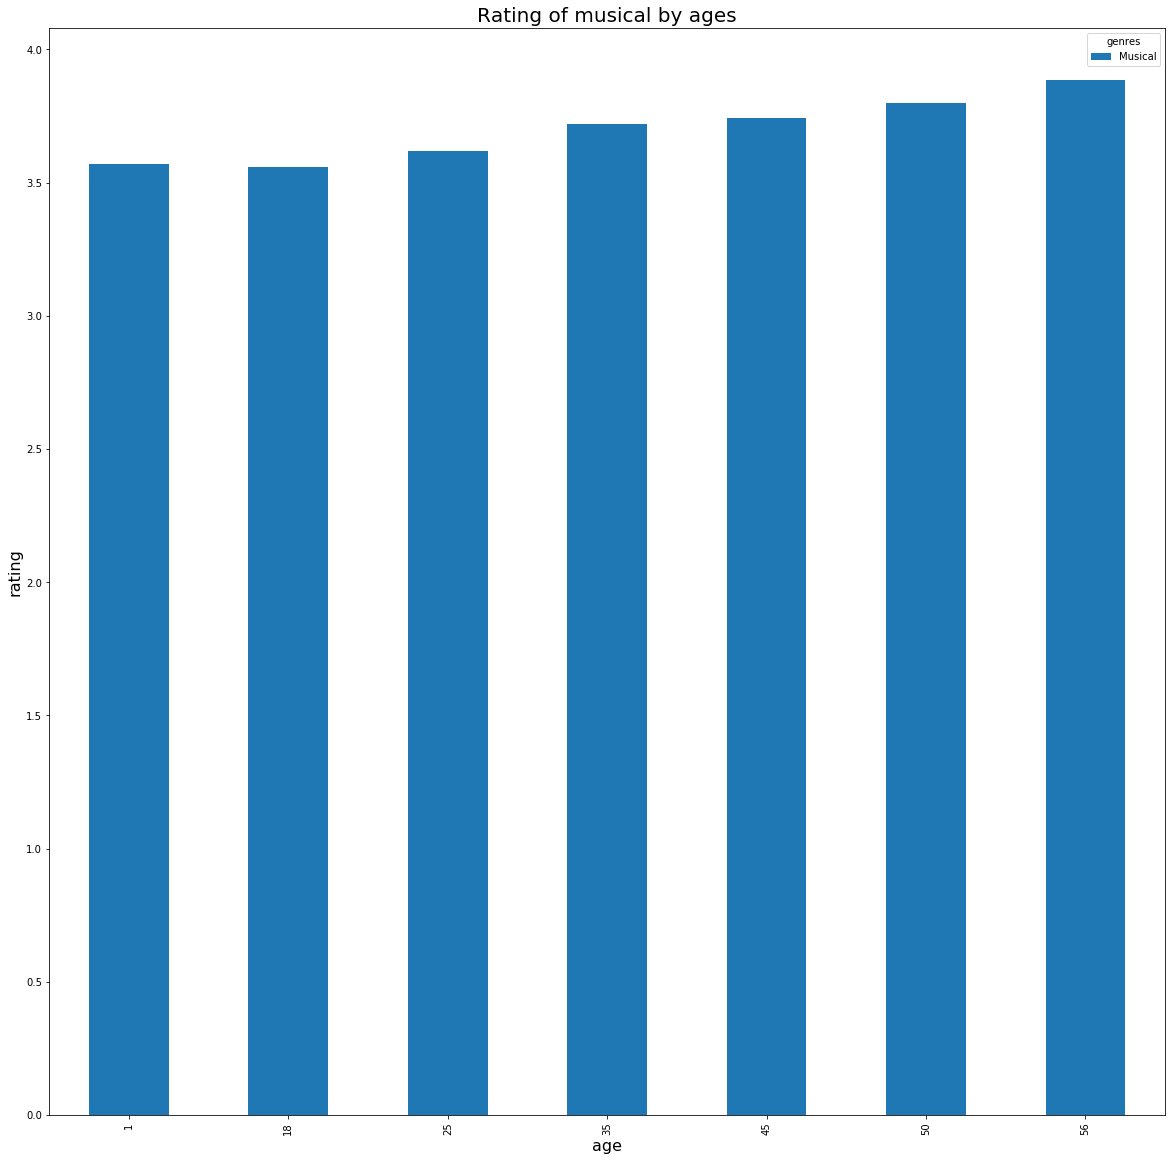

In [232]:
mean_ratings_age_musical.plot(kind='bar', figsize=[20, 20])
plt.title('Rating of musical by ages', fontsize=20)
plt.ylabel('rating', fontsize=16)
plt.xlabel('age', fontsize=16);
plt.show()

In [233]:
mean_ratings_age_children = mean_ratings_age[mean_ratings_age.columns[4:5]]

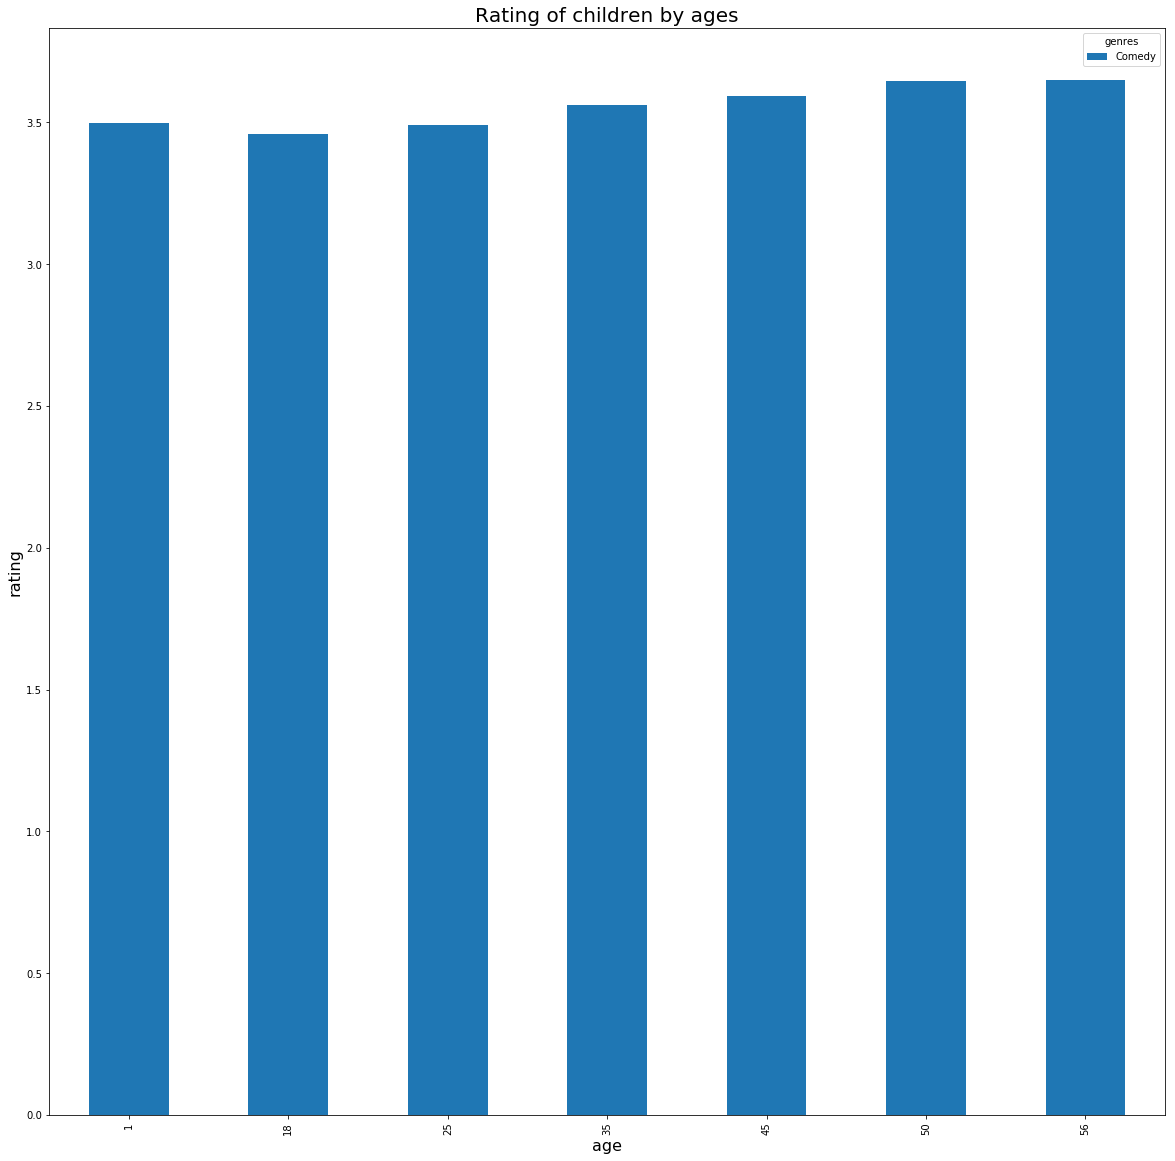

In [234]:
mean_ratings_age_children.plot(kind='bar', figsize=[20, 20])
plt.title('Rating of children by ages', fontsize=20)
plt.ylabel('rating', fontsize=16)
plt.xlabel('age', fontsize=16);
plt.show()

Conclusion: We see a increasing rating trend for Musical and Children's movie as age increasing. It is reasonable for older people to enjoy Musical movies, but it is suprisingly that older people also like Children's movie more.

### Grade: 95/100
> 1. 10/10
> 2. 10/10
> 3. 10/10
> 4. 15/20 Breakdown by age might want you to add age group labels to different ages, not a simple one-step aggregate. You can find examples in the blog that provided in the assignment.
> 5. 30/30
> 6. 20/20

Well done!